In [ ]:
# All Library or module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
import os
directory = "/content/drive/MyDrive/CSE 422 Project/"
os.chdir(directory)

In [ ]:
!ls

'Dataset v2.csv'  'Heart 2020 Dataset.csv'


In [ ]:
dataset = pd.read_csv('Heart 2020 Dataset.csv')

In [ ]:
dataset.shape

(85441, 19)

In [ ]:
# Number of features
print(len(dataset.columns))
a = list(dataset.columns)
print(a)

19
['HeartDisease', 'Height', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [ ]:
# Inspect the data to determine the type of class/label
for i in a:
  class_labels = dataset[i]
  unique_labels = class_labels.unique()
  print(f"Unique class/label values of column {i}:", unique_labels)

Unique class/label values of column HeartDisease: ['No' 'Yes']
Unique class/label values of column Height: [152. 212. 205. 226. 175. 191. 218. 163. 230. 170. 157. 199. 201. 161.
 196. 224. 215. 177. 193. 228. 184. 220. 227. 182. 174. 169. 168. 162.
  nan 172. 171. 222. 204. 164. 202. 225. 178. 156. 154. 229. 185. 203.
 160. 176. 197. 213. 195. 189. 194. 173. 159. 192. 179. 187. 207. 186.
 211. 223. 151. 153. 166. 214. 221. 165. 180. 167. 200. 217. 198. 210.
 206. 183. 231. 209. 219. 181. 188. 216. 155. 150. 190. 208. 158.]
Unique class/label values of column BMI: [16.6  20.34 26.58 ... 58.02 33.4  46.27]
Unique class/label values of column Smoking: ['Yes' 'No' nan]
Unique class/label values of column AlcoholDrinking: ['No' 'Yes' nan]
Unique class/label values of column Stroke: ['No' 'Yes' nan]
Unique class/label values of column PhysicalHealth: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. nan 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
Unique class

In [ ]:
#Data Points

# Get the number of data points using the shape attribute
num_data_points = dataset.shape[0]

# len() function to get the number of rows or data points
num_data_points = len(dataset)

# Print the number of data points
print("Number of data points:", num_data_points)

Number of data points: 85441


In [ ]:
# types of features

# Get the unique column names or types of features
unique_features = dataset.columns.tolist()

# Get the number of unique column names or types of features
num_unique_features = len(unique_features)

# Print the unique column names or types of features and the number of unique features
print("Unique column names or types of features:", unique_features)
print("Number of unique features:", num_unique_features)

Unique column names or types of features: ['HeartDisease', 'Height', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
Number of unique features: 19


<ipython-input-89-d92f7b5cb4a8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


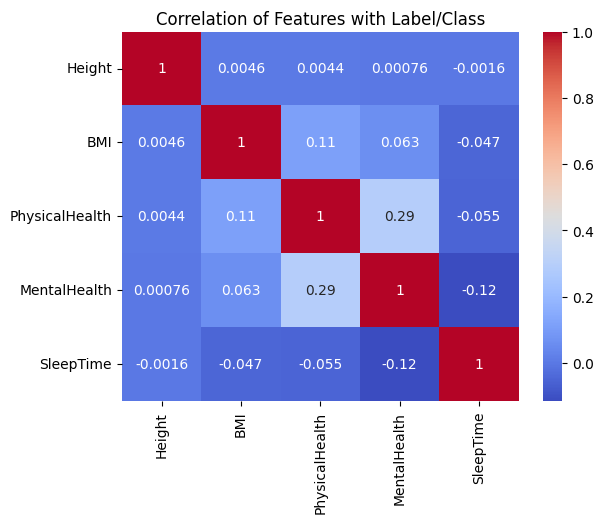

In [ ]:
# Correlation of the features along with the label/class
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation of Features with Label/Class')

# Display the plot
plt.show()

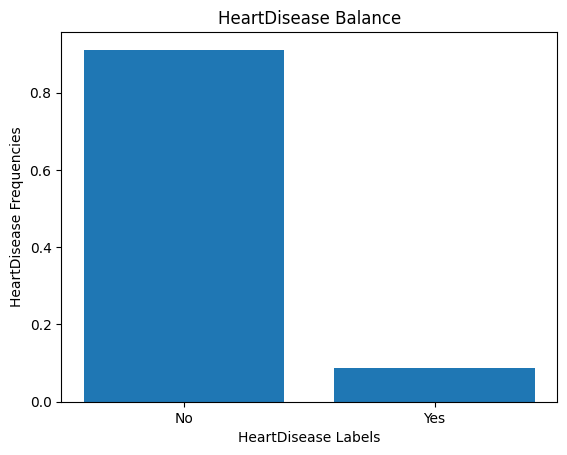

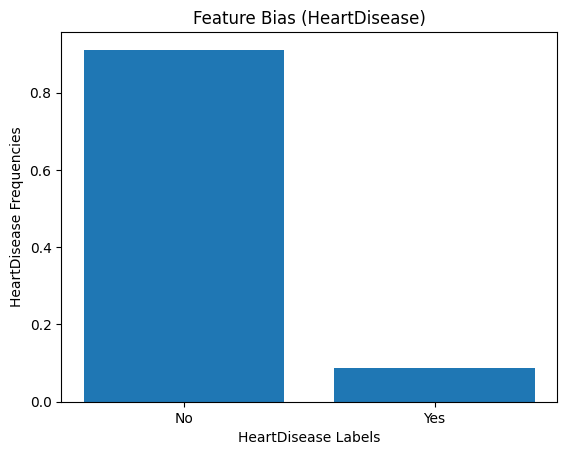

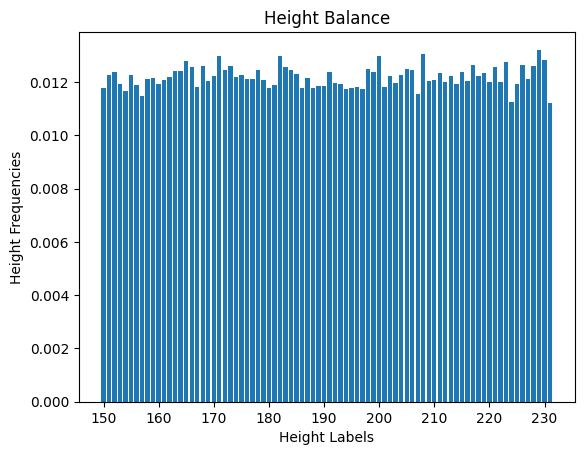

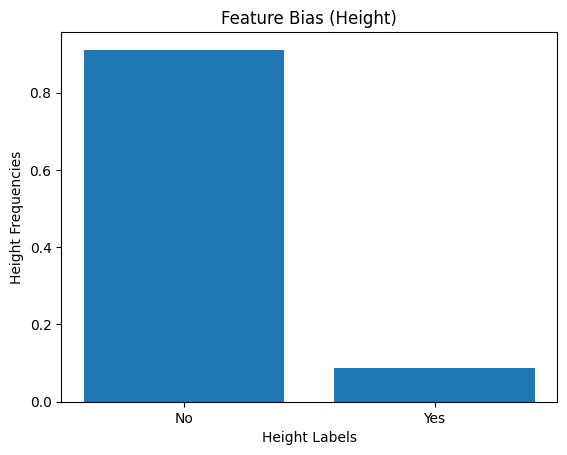

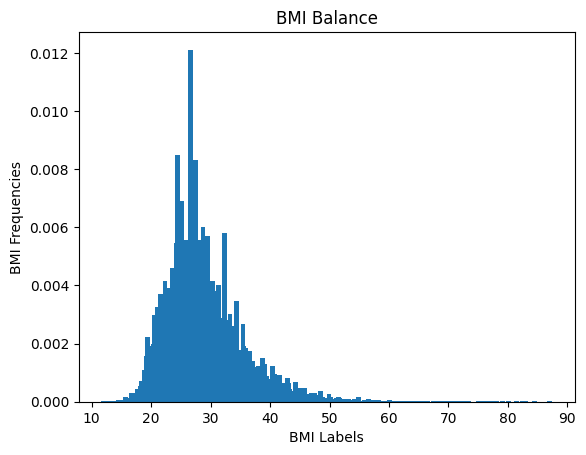

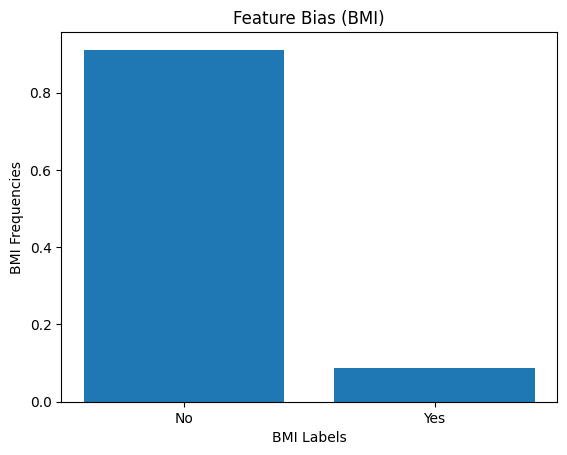

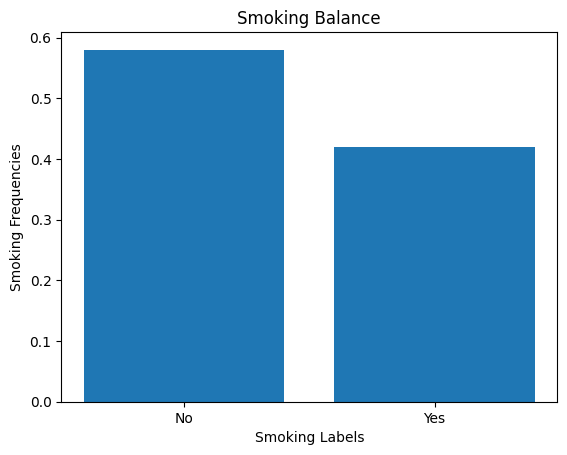

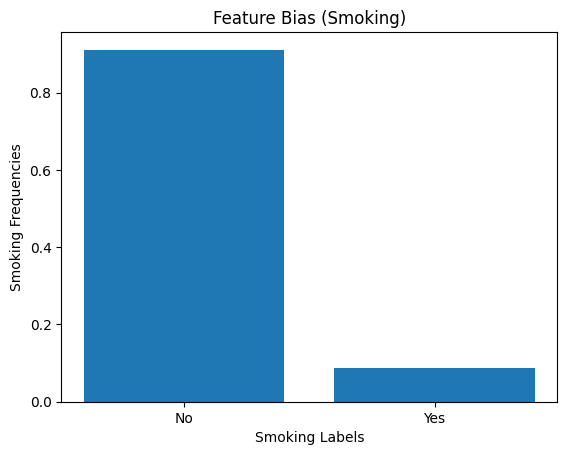

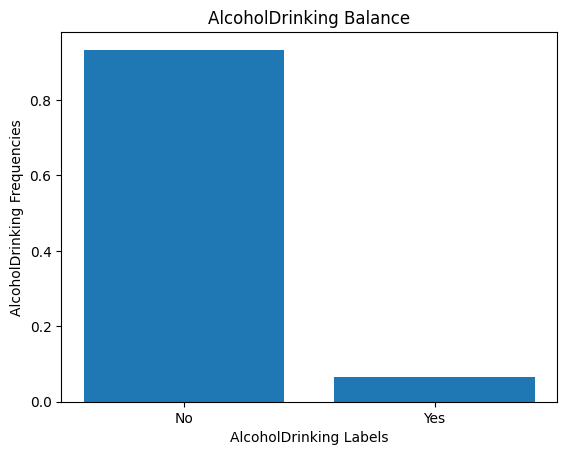

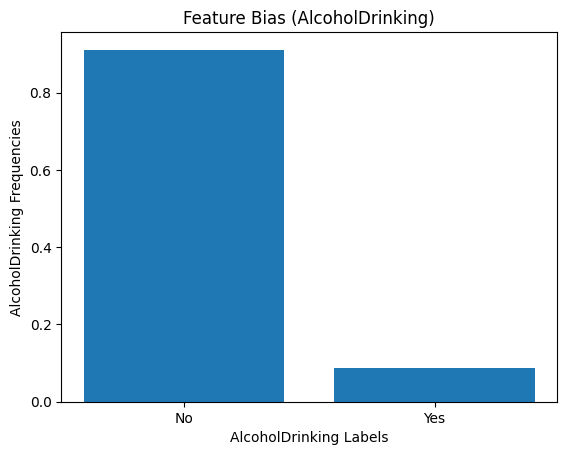

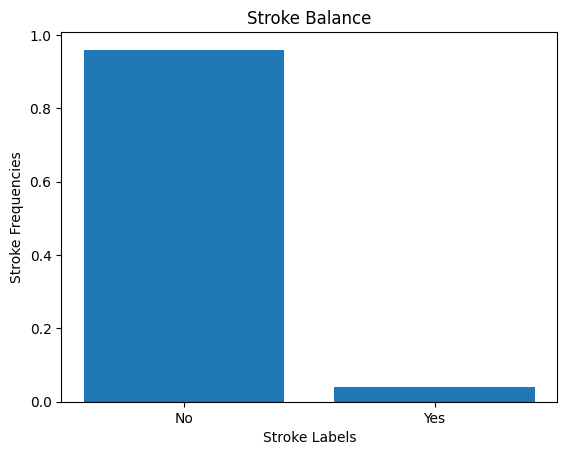

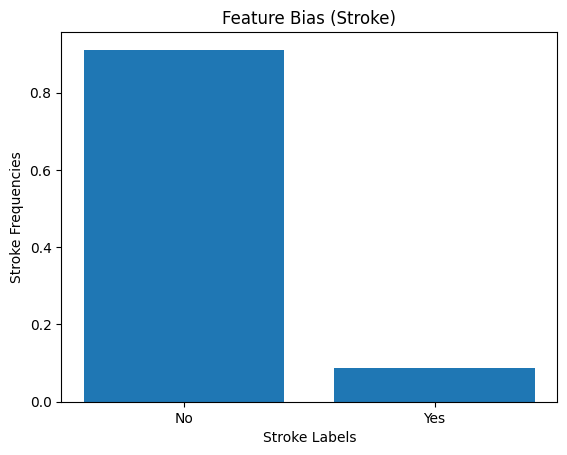

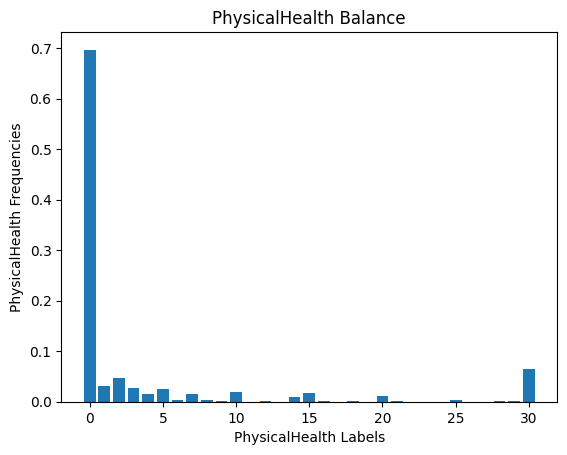

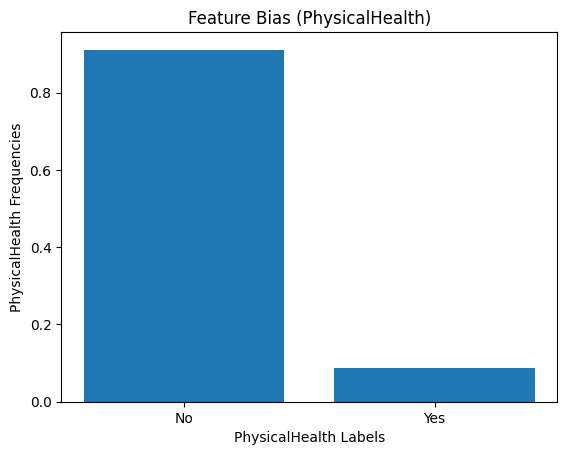

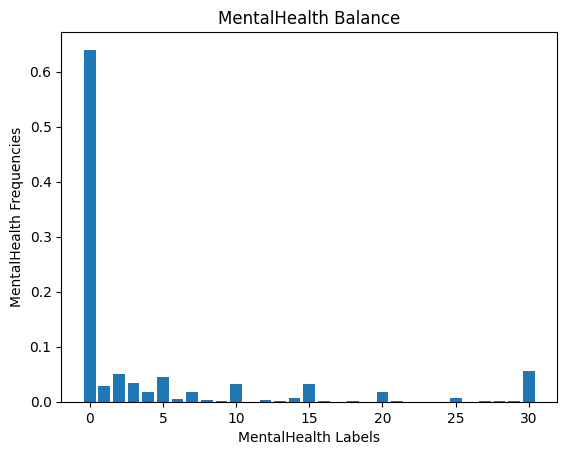

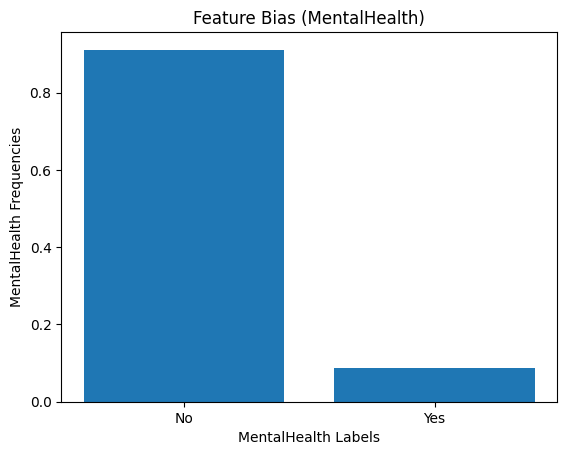

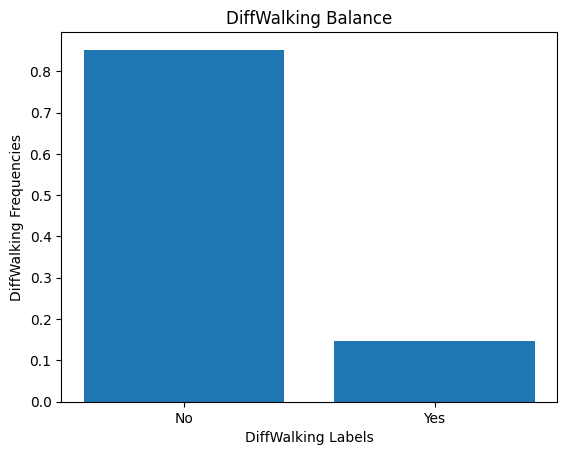

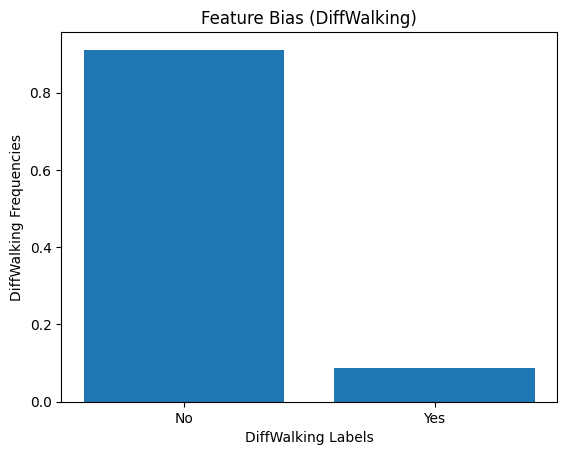

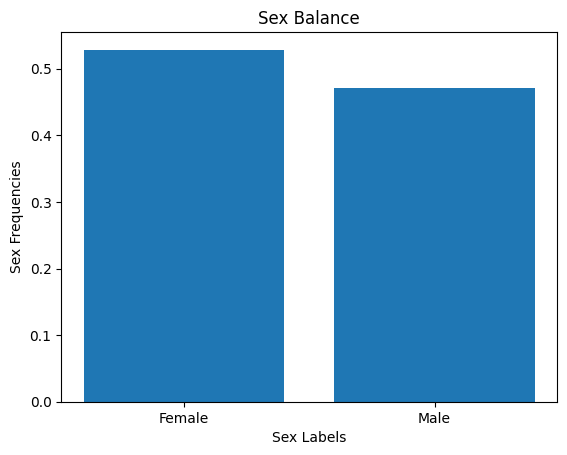

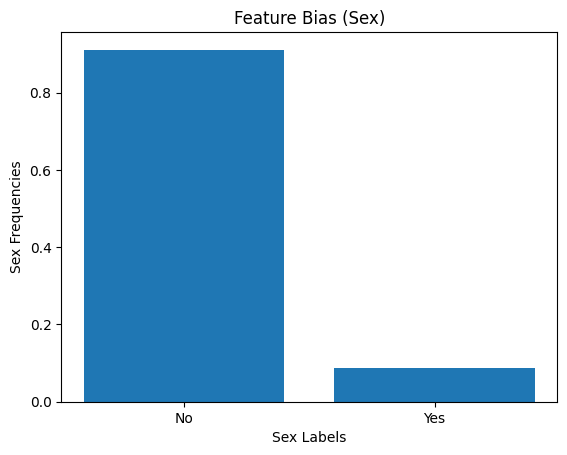

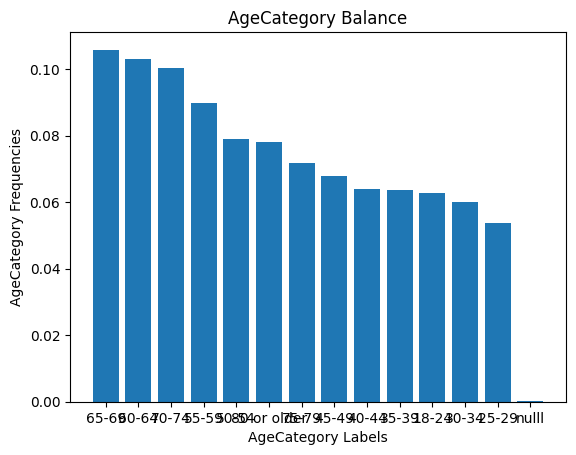

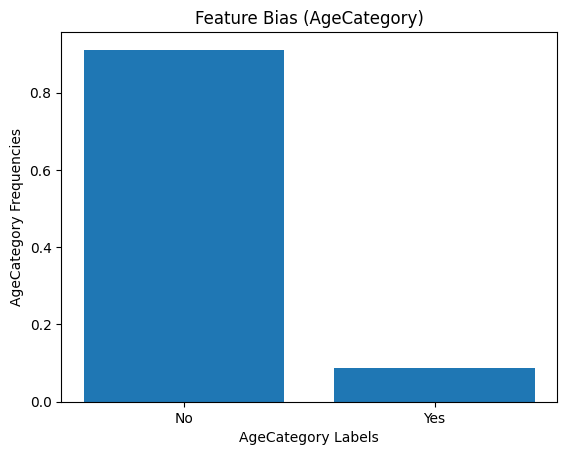

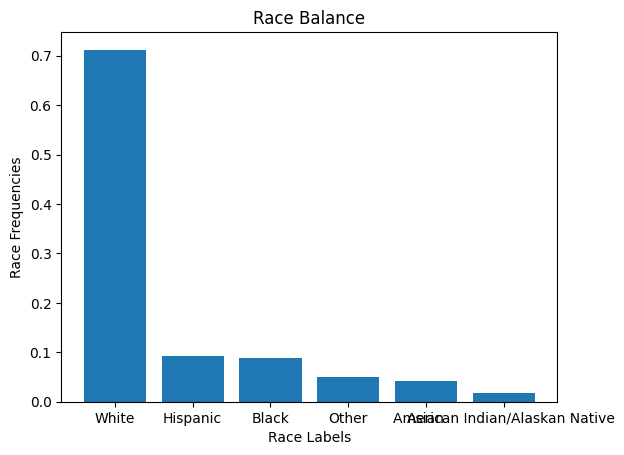

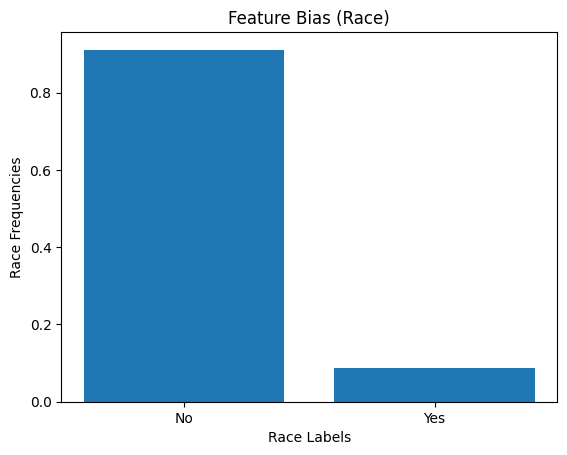

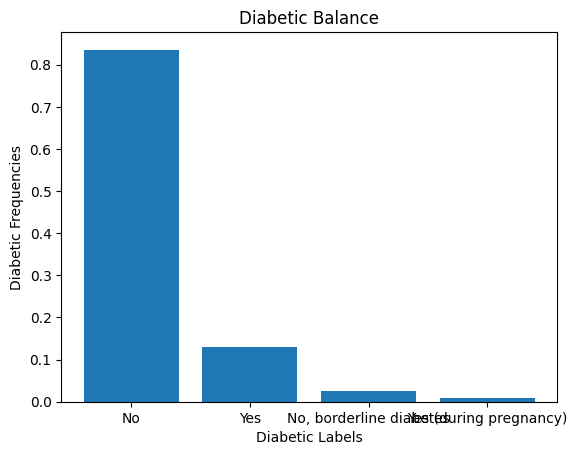

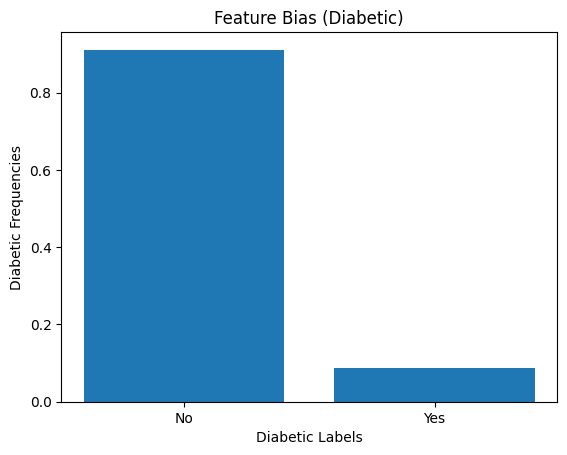

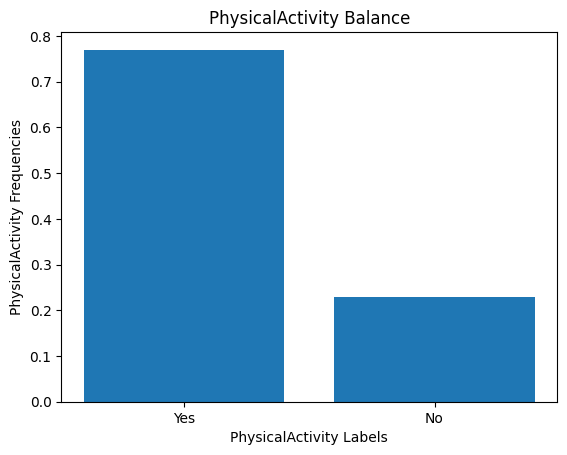

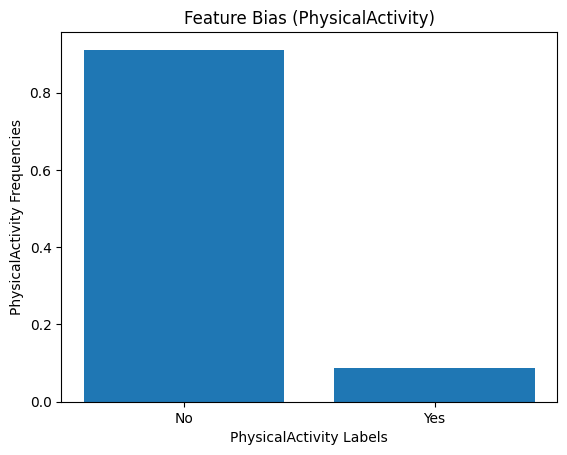

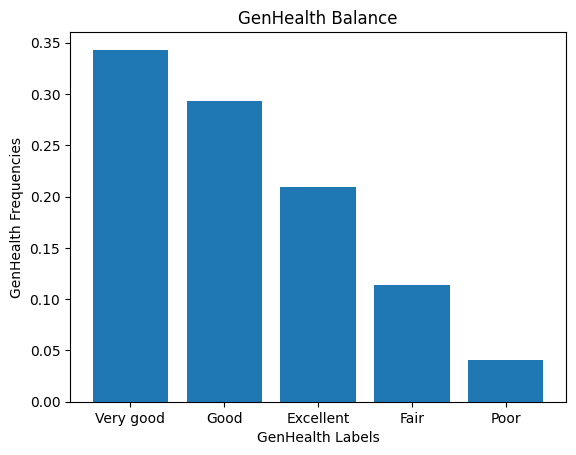

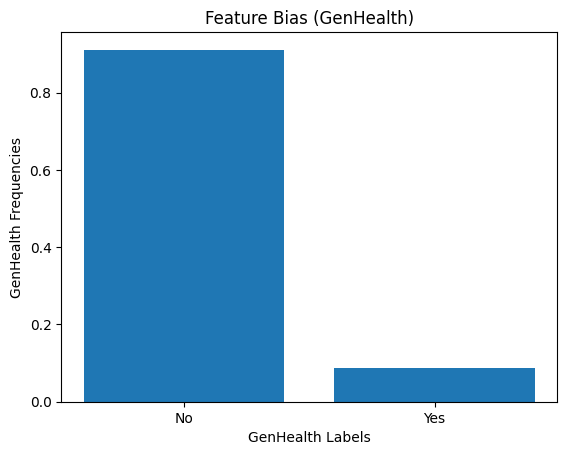

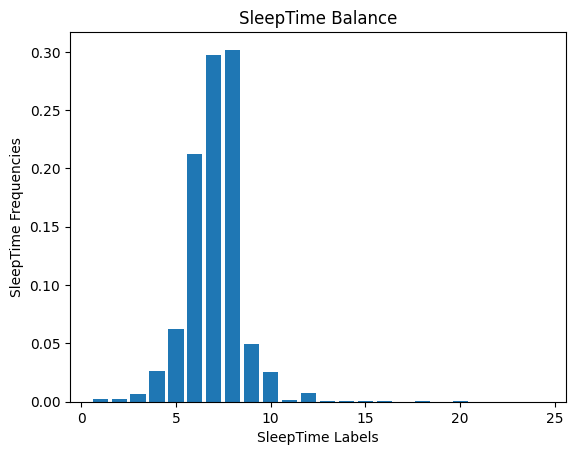

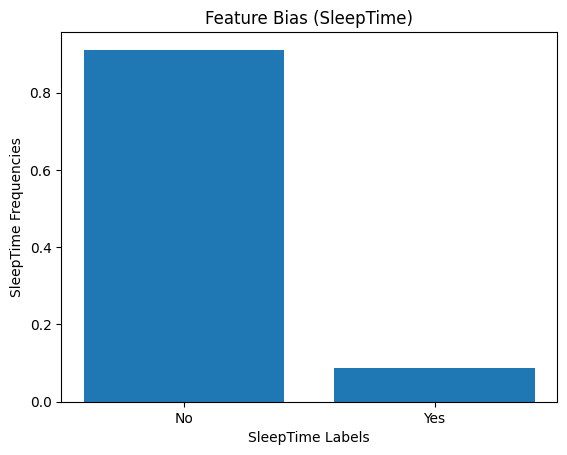

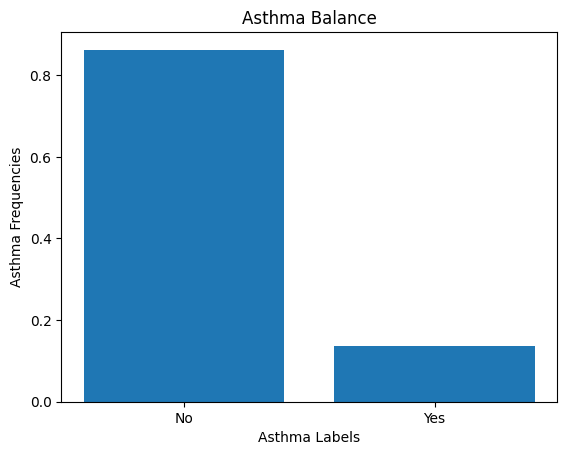

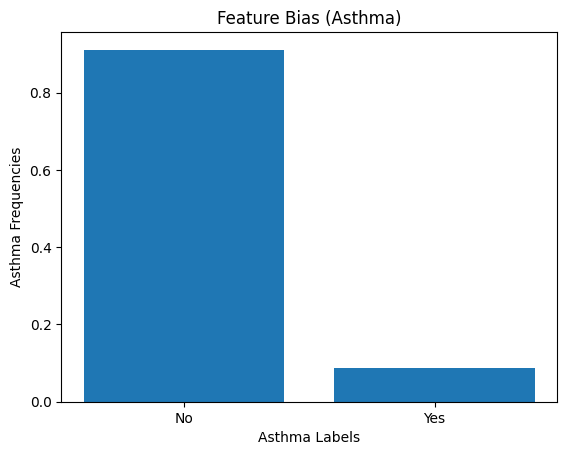

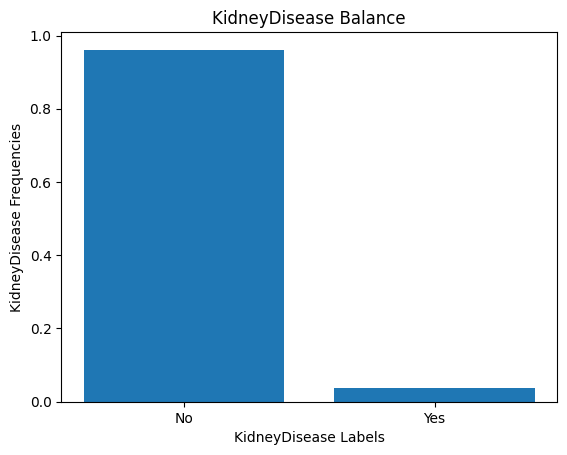

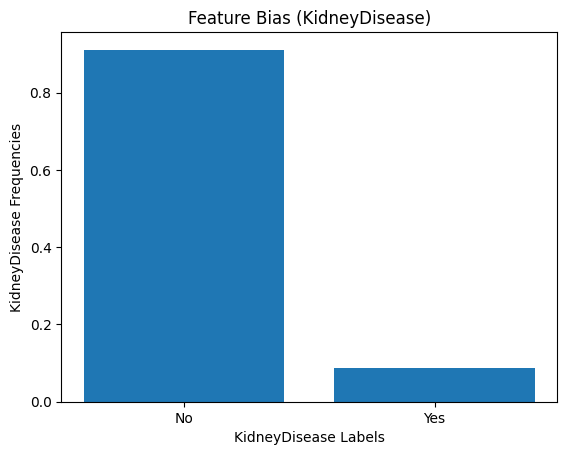

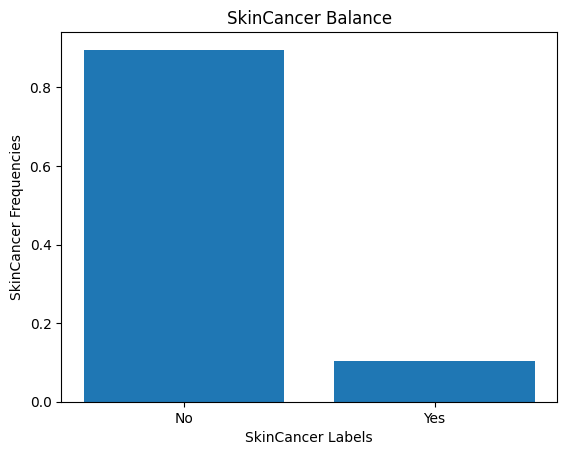

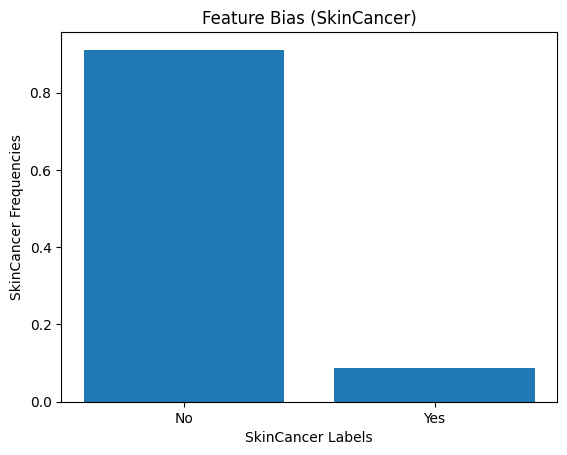

In [ ]:
# Bias / Balanced

lst = ['HeartDisease', 'Height', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

for i in lst:
  # Check for class balance
  class_counts = dataset[i].value_counts()  # Replace 'target_column' with the column name for the target variable in your dataset
  class_labels = class_counts.index
  class_frequencies = class_counts / class_counts.sum()
  class_balance = class_frequencies.max() / class_frequencies.min()


  plt.bar(class_labels, class_frequencies)
  plt.xlabel(f'{i} Labels')
  plt.ylabel(f'{i} Frequencies')
  plt.title(f'{i} Balance')
  plt.show()

  column = 'HeartDisease'  # Replace with the column name for gender in your dataset
  counts = dataset[column].value_counts()
  labels = counts.index
  frequencies = counts / counts.sum()

  plt.bar(labels, frequencies)
  plt.xlabel(f'{i} Labels')
  plt.ylabel(f'{i} Frequencies')
  plt.title(f'Feature Bias ({i})')
  plt.show()

In [ ]:
dataset.isnull()

,HeartDisease,Height,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
85437,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
85438,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
85439,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [ ]:
dataset.isnull().sum()

HeartDisease           0
Height               919
BMI                   46
Smoking               84
AlcoholDrinking       96
Stroke               115
PhysicalHealth       283
MentalHealth         116
DiffWalking          405
Sex                  607
AgeCategory          473
Race                  95
Diabetic             242
PhysicalActivity       9
GenHealth             25
SleepTime              0
Asthma                 0
KidneyDisease       5442
SkinCancer          5442
dtype: int64

In [ ]:
nan_attr = 0
for e in dataset.isnull().sum():
  if e>0:
    nan_attr += 1
print(nan_attr)

16


In [ ]:
# Dropping Column

list_of_columns_to_drop =["Height"]
dataset = dataset.drop(list_of_columns_to_drop, axis = 1) # 1 means column

In [ ]:
# Dropping Rows
print("Shape before removing null values: ", dataset.shape)
dataset = dataset.dropna(axis=0, subset=list(dataset.columns))
print("Shape after removing null values: ", dataset.shape)

Shape before removing null values:  (85441, 18)
Shape after removing null values:  (77492, 18)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77492 entries, 0 to 79982
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      77492 non-null  object 
 1   BMI               77492 non-null  float64
 2   Smoking           77492 non-null  object 
 3   AlcoholDrinking   77492 non-null  object 
 4   Stroke            77492 non-null  object 
 5   PhysicalHealth    77492 non-null  float64
 6   MentalHealth      77492 non-null  float64
 7   DiffWalking       77492 non-null  object 
 8   Sex               77492 non-null  object 
 9   AgeCategory       77492 non-null  object 
 10  Race              77492 non-null  object 
 11  Diabetic          77492 non-null  object 
 12  PhysicalActivity  77492 non-null  object 
 13  GenHealth         77492 non-null  object 
 14  SleepTime         77492 non-null  int64  
 15  Asthma            77492 non-null  object 
 16  KidneyDisease     77492 non-null  object

In [ ]:
object_type_list = ["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","Race","AgeCategory","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]
for i in object_type_list:
  enc = LabelEncoder()
  dataset[i] = enc.fit_transform(dataset[i])



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77492 entries, 0 to 79982
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      77492 non-null  int64  
 1   BMI               77492 non-null  float64
 2   Smoking           77492 non-null  int64  
 3   AlcoholDrinking   77492 non-null  int64  
 4   Stroke            77492 non-null  int64  
 5   PhysicalHealth    77492 non-null  float64
 6   MentalHealth      77492 non-null  float64
 7   DiffWalking       77492 non-null  int64  
 8   Sex               77492 non-null  int64  
 9   AgeCategory       77492 non-null  int64  
 10  Race              77492 non-null  int64  
 11  Diabetic          77492 non-null  int64  
 12  PhysicalActivity  77492 non-null  int64  
 13  GenHealth         77492 non-null  int64  
 14  SleepTime         77492 non-null  int64  
 15  Asthma            77492 non-null  int64  
 16  KidneyDisease     77492 non-null  int64 

In [ ]:
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
# Download new data set
dataset.to_csv('Dataset v2.csv', index=False)

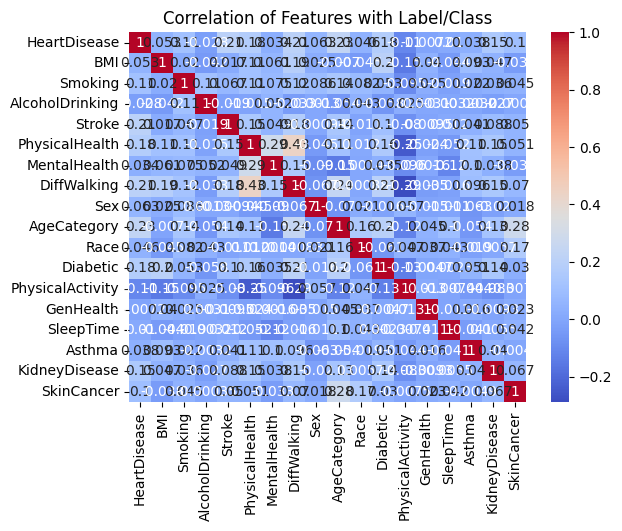

In [ ]:
# Correlation of the features along with the label/class
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation of Features with Label/Class')

# Display the plot
plt.show()

In [ ]:
#create independent and Dependent Feature
columns = dataset.columns.tolist()
#Filter the columns to remove data we  do not want
columns = [c for c in columns if c not in ["HeartDisease"]]
#store the var we are predicting
target = "HeartDisease"
#define a random state
state = np.random.RandomState(42)
#feature value
X = dataset[columns]
#target value
Y = dataset[target]
x_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [ ]:
# Data Balancing
under_sampler = RandomUnderSampler()
x, y = under_sampler.fit_resample(X, Y)
x.shape, y.shape

((13340, 17), (13340,))

In [ ]:
# Split the dataset between Train and Test Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print (x_train. shape, x_test.shape, y_train. shape, y_test.shape)

(10005, 17) (3335, 17) (10005,) (3335,)


In [ ]:
# Scalling
scaler = MinMaxScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
# Logistic Regression

Logisctic = LogisticRegression(max_iter=1000)
Logisctic.fit(X_train_scaled, y_train)

y_pred = Logisctic.predict(X_test_scaled)
Logisctic_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Logisctic_accuracy)
print()
print("======================================================")
print(classification_report(y_test,y_pred))

Accuracy: 0.7559220389805097

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1613
           1       0.77      0.76      0.76      1722

    accuracy                           0.76      3335
   macro avg       0.76      0.76      0.76      3335
weighted avg       0.76      0.76      0.76      3335



<Axes: >

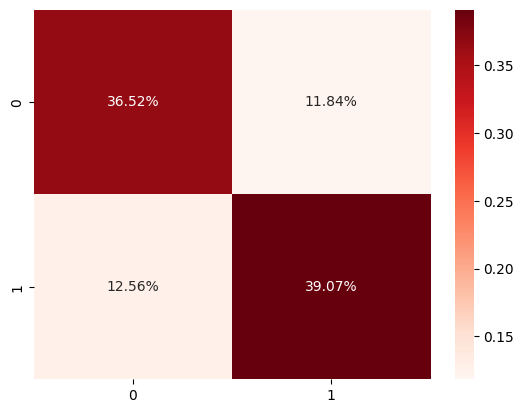

In [ ]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# Decision tree

Decision_model = DecisionTreeClassifier()

Decision_model.fit(X_train_scaled, y_train)
y_pred = Decision_model.predict(X_test_scaled)

Decision_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Decision_accuracy)
print()
print("======================================================")
print(classification_report(y_test,y_pred))

Accuracy: 0.6698650674662668

              precision    recall  f1-score   support

           0       0.65      0.68      0.67      1613
           1       0.69      0.66      0.67      1722

    accuracy                           0.67      3335
   macro avg       0.67      0.67      0.67      3335
weighted avg       0.67      0.67      0.67      3335



<Axes: >

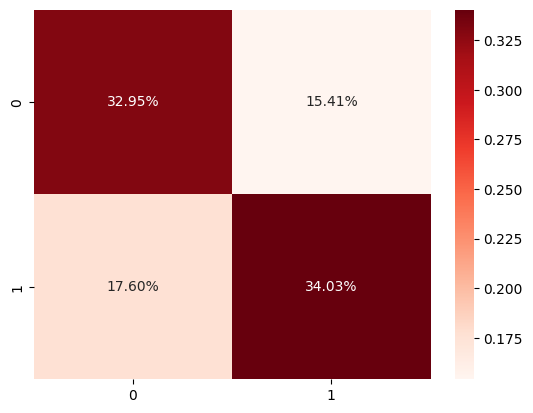

In [ ]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# Kth Nearest Neighbor

knn = KNN(n_neighbors=5)

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)
print()
print("======================================================")
print(classification_report(y_test,y_pred))

Accuracy: 0.7376311844077961

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1613
           1       0.75      0.74      0.75      1722

    accuracy                           0.74      3335
   macro avg       0.74      0.74      0.74      3335
weighted avg       0.74      0.74      0.74      3335



<Axes: >

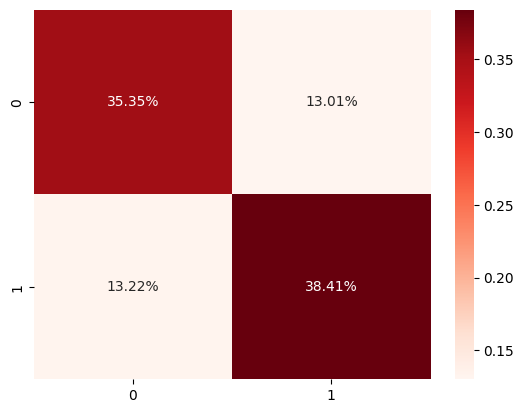

In [ ]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# SVM

svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)
print()
print("======================================================")
print(classification_report(y_test,y_pred))

Accuracy: 0.7580209895052473

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1613
           1       0.76      0.78      0.77      1722

    accuracy                           0.76      3335
   macro avg       0.76      0.76      0.76      3335
weighted avg       0.76      0.76      0.76      3335



<Axes: >

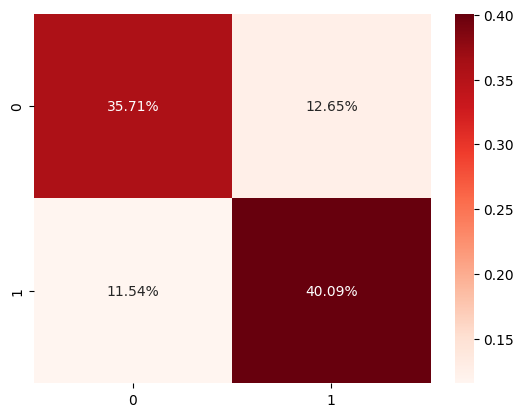

In [ ]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# Naive Bayes Classifier

naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
y_pred = naive_bayes.predict(X_test_scaled)

naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", naive_bayes_accuracy)
print()
print("======================================================")
print(classification_report(y_test,y_pred))

Accuracy: 0.7034482758620689

              precision    recall  f1-score   support

           0       0.65      0.84      0.73      1613
           1       0.79      0.58      0.67      1722

    accuracy                           0.70      3335
   macro avg       0.72      0.71      0.70      3335
weighted avg       0.72      0.70      0.70      3335



<Axes: >

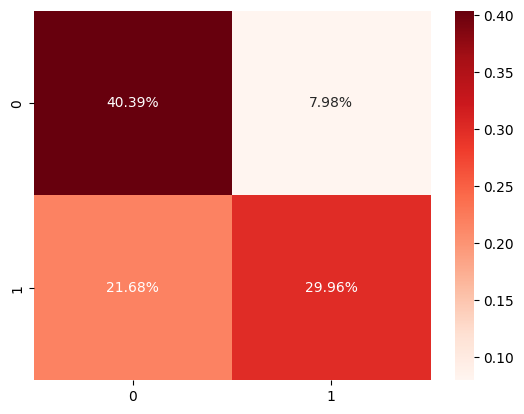

In [ ]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

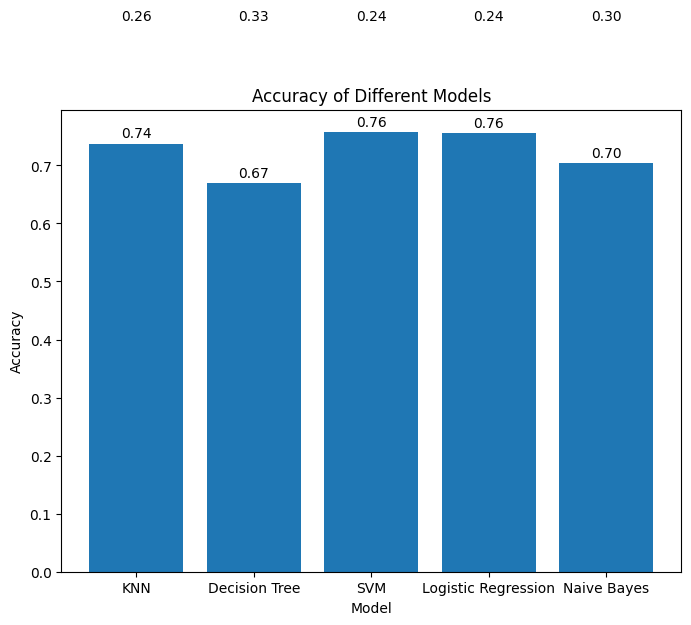

In [ ]:
# Model selection/Comparison analysis

error_rate_knn = 1 - knn_accuracy
error_rate_dt = 1 - Decision_accuracy
error_rate_svm = 1 - svm_accuracy
error_rate_lr = 1 - Logisctic_accuracy
error_rate_nb = 1 - naive_bayes_accuracy

models = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes']
accuracies = [knn_accuracy, Decision_accuracy, svm_accuracy, Logisctic_accuracy, naive_bayes_accuracy]
error_rates = [error_rate_knn, error_rate_dt, error_rate_svm, error_rate_lr, error_rate_nb]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(models, accuracies)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Models')


for i in range(len(models)):
    ax.text(models[i], accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
    ax.text(models[i], 0.95, f'{error_rates[i]:.2f}', ha='center')

plt.show()

In [ ]:
# Test on an unseen instance


unseen_instance = np.array([[35.15,	1,	0,	0,	0,	0,	0,	1,	10,	5,	0,	1,	2,	8,	0,	0, 0]	])
pred_knn = knn.predict(unseen_instance)
pred_dt = Decision_model.predict(unseen_instance)
pred_svm = svm.predict(unseen_instance)
pred_lr = Logisctic.predict(unseen_instance)
pred_nb = naive_bayes.predict(unseen_instance)

print("Prediction for an unseen instance:")
print(f"KNN: {pred_knn}")
print(f"Decision Tree: {pred_dt}")
print(f"SVM: {pred_svm}")
print(f"Logistic Regression: {pred_lr}")
print(f"Naive Bayes: {pred_nb}")

# Test on a set of unseen instances
unseen_instances = np.array([[32.36,	0,	0,	0,	0,	0,	0,	1,	10,	5,	2,	1,	0,	8,	1,	0,0], [32.61,	1,	0,	0,	0,	0,	0,	0,	9,	5,	0,	1,	1,	5,	1,	0,	1], [26.04,	0,	0,	0,	0,	0,	0,	0,	11,	2,	2,	1,	4,	7,	0,	0,	0]])
preds_knn = knn.predict(unseen_instances)
preds_dt = Decision_model.predict(unseen_instances)
preds_svm = svm.predict(unseen_instances)
preds_lr = Logisctic.predict(unseen_instances)
preds_nb = naive_bayes.predict(unseen_instances)

print("Predictions for set of unseen instances:")
print(f"KNN: {preds_knn}")
print(f"Decision Tree: {preds_dt}")
print(f"SVM: {preds_svm}")
print(f"Logistic Regression: {preds_lr}")
print(f"Naive Bayes: {preds_nb}")

Prediction for an unseen instance:
KNN: [1]
Decision Tree: [0]
SVM: [1]
Logistic Regression: [1]
Naive Bayes: [1]
Predictions for set of unseen instances:
KNN: [1 1 1]
Decision Tree: [0 1 0]
SVM: [1 1 1]
Logistic Regression: [1 1 1]
Naive Bayes: [1 1 1]
